# AUTHOR : JAYACHANDRAN A M

## TASK 2 : PREDICTION USING UNSUPERVISED ML

## PROBLEM STATEMENT : From the given iris dataset, predict the optimum number of clusters and represent it visually

Importing libraries

In [15]:
#importing the libraries required
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

## Data Collection and Pre-processing

In [16]:
#loading the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data,
columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
#getting the shape of data set
iris_df.shape

(150, 4)

In [18]:
#getting the attributes
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [19]:
#gettng the datatypes
iris_df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [20]:
#getting thr information about dataset
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [21]:
#getting the statistical value
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
#checking the null value if any
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [23]:
#checking the duplicate values if any
iris_df.duplicated().sum()

1

# DATA VISUALISATION

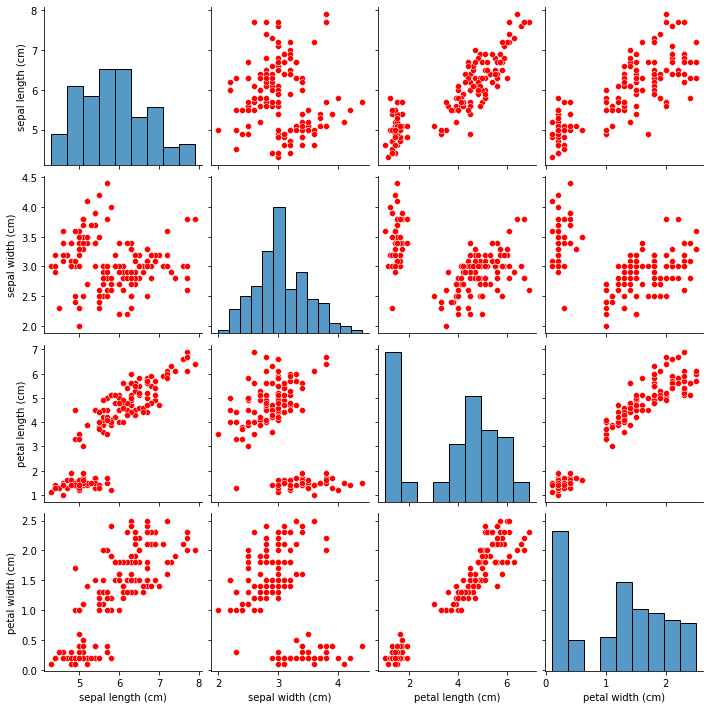

In [24]:
#pair plot
sns.pairplot(iris_df,plot_kws={'color':'red'})

<AxesSubplot:>

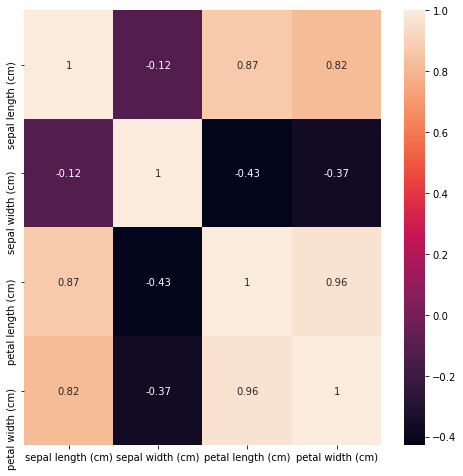

In [25]:
#heatmap
plt.figure(figsize=(8,8))
correlation=iris_df.corr()
sns.heatmap(correlation,annot=True)

# DATA PREPARATION

In [26]:
x=iris_df.iloc[:,0:4].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Choosing the optimum number of clusters

We need to fins the optimum nuber of clusters. For choosing the number of clusters we are using the parameter WCSS (Within clusters Sum of Squares). In this we find the distance of the data points from the centroid. it shold be minimum.

In [ ]:
#finding wcss for different number of clusters
#for 10 clusters
from sklearn.cluster import KMeans
WCSS = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 3)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)

In [32]:
WCSS

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.25552380952379,
 46.44618205128204,
 39.30610712530712,
 34.42019178628389,
 30.015880952380968,
 28.559686147186174,
 26.102373433583967]

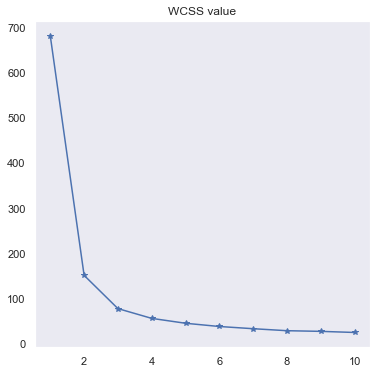

In [34]:
#plot the elbow graph to see which number of clusters have the minimum WCSS values
sns.set() #gives basic parameters of the graph
plt.figure(figsize=(6,6))
plt.plot(range(1,11), WCSS,marker='*')
plt.title('WCSS value')
plt.show()

## Optimum Number of Clusters are 3

# ModelTraining



In [30]:
#training the K-Means clustering model
kmeans = KMeans(n_clusters = 3, init = 'k-means++',random_state = 0)
y_pred = kmeans.fit_predict(x)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

# Visualising the Clusters

<function matplotlib.pyplot.show(close=None, block=None)>

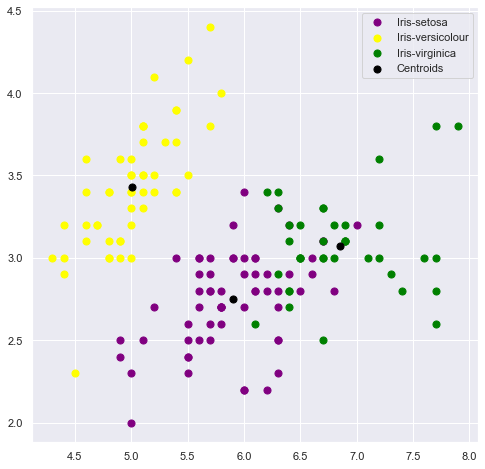

In [31]:
#plotting the datapoints and centroids
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], 
s = 50, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], 
s = 50, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1],
s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
s = 50, c = 'black', label = 'Centroids')
plt.legend()
plt.show

## Therefore the optimum number of clusters are 3 

# Thank you